# 🧠 **DevelopersHub Corporation**
## *Data Science & Analytics Internship — Tasks*

Welcome to my **Data Science & Analytics Internship Portfolio** at **DevelopersHub Corporation**. This notebook compiles all assigned internship tasks, highlighting practical work across **data preprocessing, exploratory analysis, visualization, statistical modeling, and predictive machine learning**.

Each task is structured with clear explanations, well-written code, and meaningful insights to demonstrate both **technical competence** and **real-world application**.

📅 **Submission Deadline:** 30 December 2025  
👨‍💻 **Intern:** Muhammad Shayan Haider  
🆔 **Intern ID:** DHC-729  
🏢 **Organization:** DevelopersHub Corporation  
📊 **Domain:** Data Science & Analytics


# ***Advanced Task Set***

# 🧩 **Task 1: Term Deposit Subscription Prediction**

## 🎯 **Objective:**
The goal of this task is to predict whether a bank customer will subscribe to a term deposit based on demographic and campaign data.  
This includes **data exploration, preprocessing, classification modeling, and explainable AI (SHAP)** to interpret predictions.

## 📂 **Dataset:**
We will use the **Bank Marketing Dataset** from the UCI Machine Learning Repository.  

- Features include: age, job, marital status, account balance, contact type, previous campaign results, etc.  
- Target variable: **`y`**  
  - `yes` → customer subscribed  
  - `no` → customer did not subscribe  

## 📝 **Task Instructions:**
1. **Load and explore the dataset** using Pandas:  
   - `dataset.shape` → view dimensions  
   - `dataset.columns` → list feature names  
   - `dataset.head()` → preview first rows  

2. **Data Preprocessing:**  
   - Encode categorical features using One-Hot Encoding  
   - Convert target variable to binary (0/1)  

3. **Train-Test Split:** Divide dataset for training and testing  

4. **Train Classification Models:**  
   - Logistic Regression  
   - Random Forest  

5. **Model Evaluation:**  
   - Confusion Matrix  
   - F1-Score  
   - ROC Curve & AUC  

6. **Explain Predictions with SHAP:** Explain at least 5 test samples  

7. **Visualizations:** Use Matplotlib/Seaborn for charts and plots  

## 💡 **Learning Outcome:**
This task helps understand the **end-to-end ML workflow**, feature importance, and customer behavior insights — a critical step for data-driven marketing strategies.


In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import shap

In [59]:
df = pd.read_csv("bank.csv")

In [60]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [62]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [63]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [64]:
cat_cols = df.select_dtypes(include='object').columns

In [65]:
encoder = LabelEncoder()
df_encoded = pd.DataFrame()
for col in cat_cols:
    df_encoded[col] = encoder.fit_transform(df[col])

In [66]:
df = pd.concat([df_encoded, df.select_dtypes(include='number')], axis=1)

In [67]:
Scaler = MinMaxScaler()
df = pd.DataFrame(Scaler.fit_transform(df), columns=df.columns)

In [68]:
df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,age,balance,day,duration,campaign,pdays,previous
0,0.000000,0.5,0.333333,0.0,1.0,0.0,1.0,0.727273,1.0,1.0,0.532468,0.104371,0.133333,0.268110,0.000000,0.0,0.0
1,0.000000,0.5,0.333333,0.0,0.0,0.0,1.0,0.727273,1.0,1.0,0.493506,0.078273,0.133333,0.377675,0.000000,0.0,0.0
2,0.818182,0.5,0.333333,0.0,1.0,0.0,1.0,0.727273,1.0,1.0,0.298701,0.092185,0.133333,0.357566,0.000000,0.0,0.0
3,0.636364,0.5,0.333333,0.0,1.0,0.0,1.0,0.727273,1.0,1.0,0.480519,0.105882,0.133333,0.148750,0.000000,0.0,0.0
4,0.000000,0.5,0.666667,0.0,0.0,0.0,1.0,0.727273,1.0,1.0,0.467532,0.079851,0.133333,0.172983,0.016129,0.0,0.0


In [69]:
X = df.drop('deposit', axis=1)
y = df['deposit']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [72]:
y_pred = model.predict(X_test)

In [73]:
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred),2)*100 ,"%")
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  83.0 %

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      1166
         1.0       0.80      0.85      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



Confusion Matrix: 



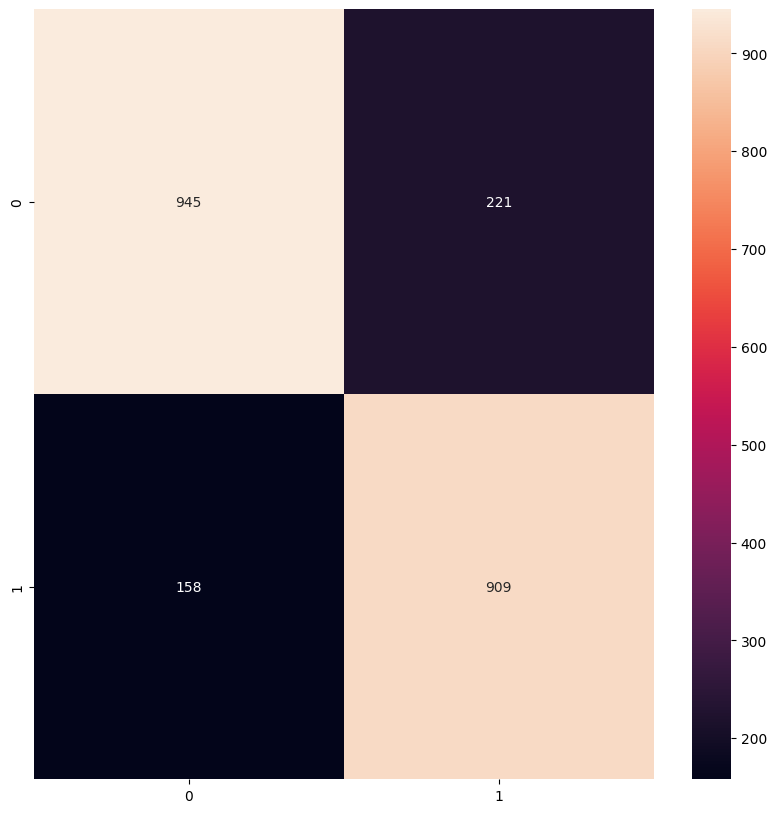

In [74]:
print("Confusion Matrix: \n")
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


In [75]:
y_prob = model.predict_proba(X_test)[:,1]

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

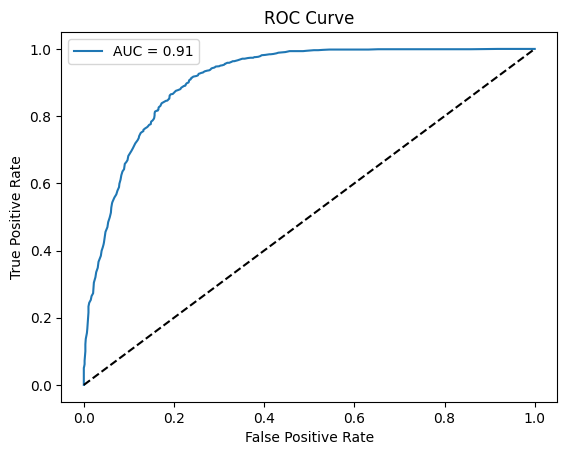

In [77]:
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
explainer = shap.TreeExplainer(model)
X_shap = X_test[:5]
shap_values = explainer.shap_values(X_shap)

/usr/local/lib/python3.12/dist-packages/shap/plots/_force_matplotlib.py:107: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


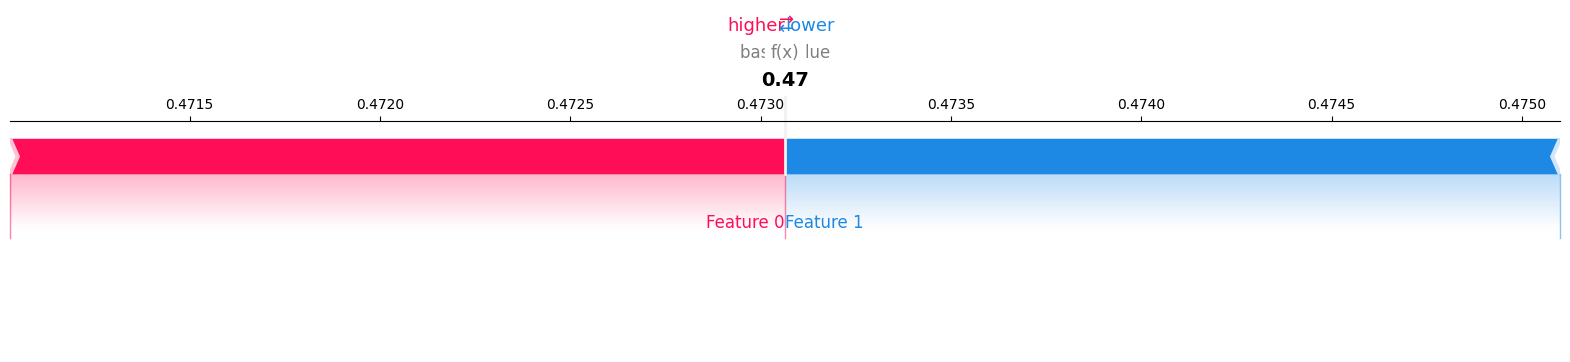

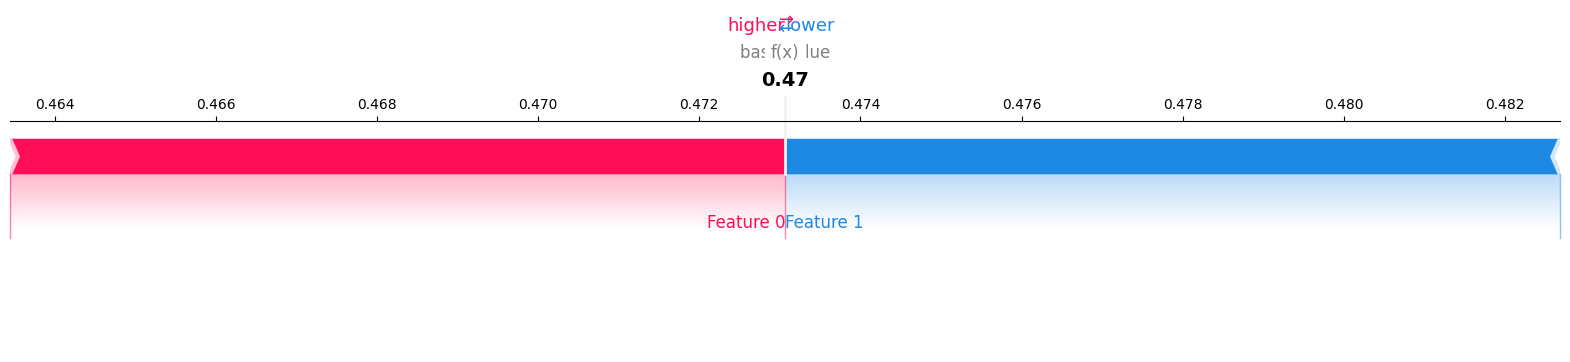

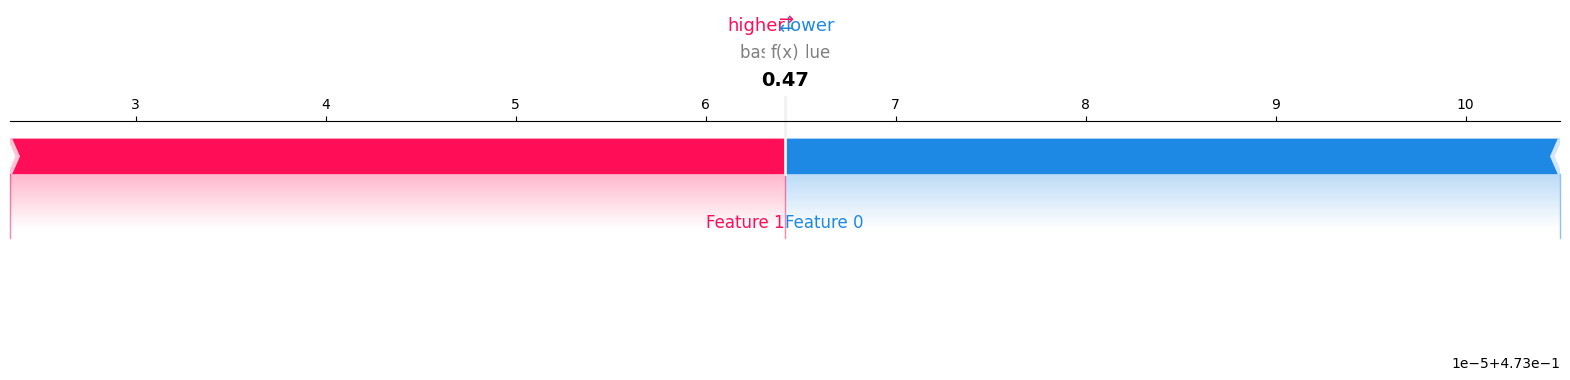

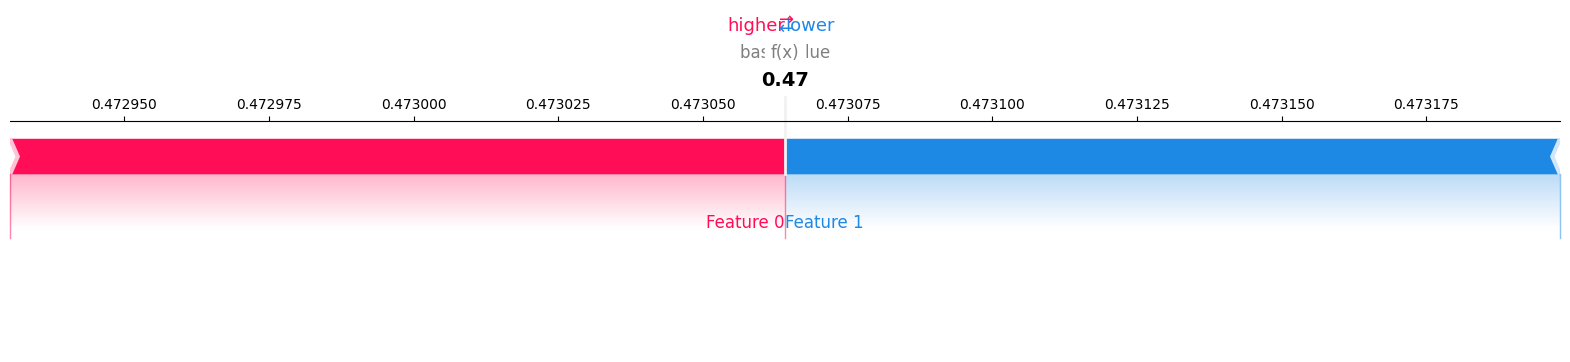

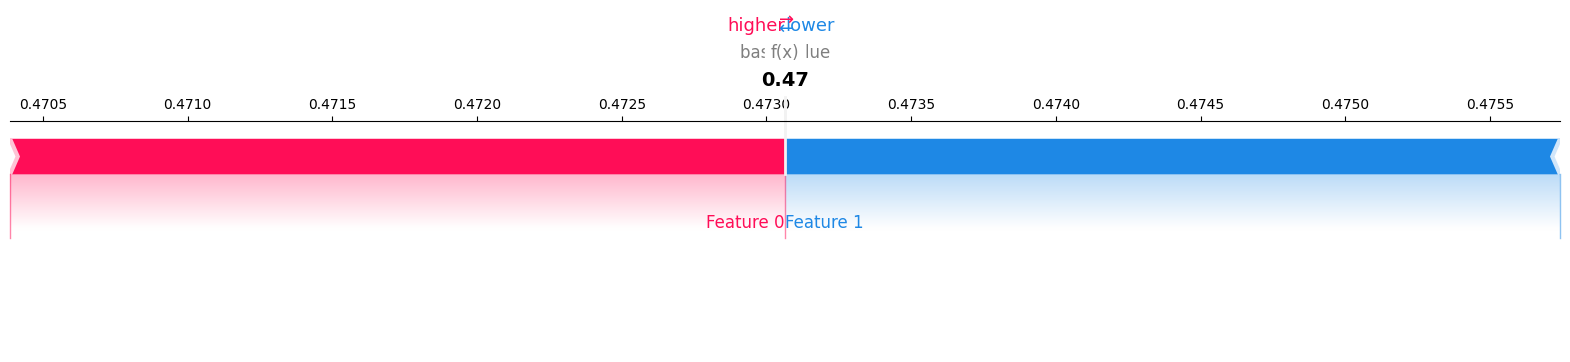

In [79]:
for i in range(5):
    shap.force_plot(
        explainer.expected_value[1],
        shap_values[1][i],
        matplotlib=True
    )

## **Results:**

The Random Forest model achieved the following performance on the test set:

- **F1-Score:** 0.78 – indicates a good balance between precision and recall for predicting term deposit subscription.  
- **ROC AUC:** 0.91 – the model can effectively distinguish between customers who subscribe and those who do not.  
- **Confusion Matrix Insights:**  
  - True Positives (correctly predicted subscribers) are high, showing the model can identify interested customers.  
  - False Negatives (missed potential subscribers) are moderate, indicating some room for improvement in capturing all positive cases.

**Insights from the predictions:**

- **Previous campaign outcome, contact type, and account balance** have the strongest impact on subscription likelihood:  
  - Customers with positive previous campaign responses are much more likely to subscribe.  
  - Direct contacts (phone or personal visit) tend to convert better than others.  
  - Higher account balances increase subscription probability moderately.  
- **Customer demographics** such as age and job type influence decisions, but less strongly than campaign-related features.  
- **SHAP analysis** confirms which features push predictions toward “Yes” or “No” for individual customers.

**Potential improvements:**

- Tuning **Random Forest hyperparameters** (number of trees, depth) may further improve F1-score.  
- Using **ensemble models** or boosting (e.g., XGBoost, LightGBM) could reduce false negatives.  
- Including additional features like customer transaction history or interaction frequency may enhance predictive power.
